In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [95]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [96]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)


In [97]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [98]:
df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [99]:
df.isnull().values.any()

False

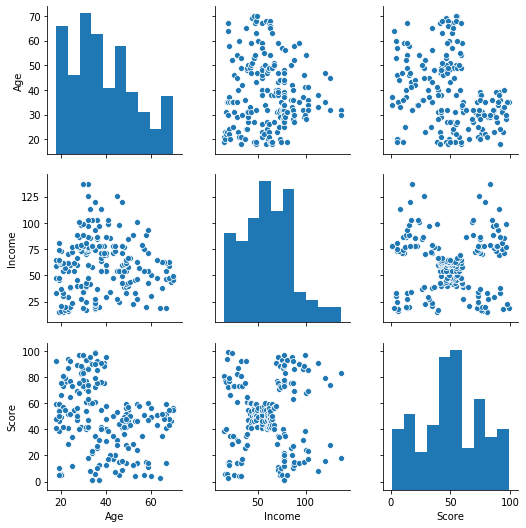

In [100]:
seaborn.pairplot(df[['Age','Income','Score',]])


In [101]:
import sklearn.cluster as cluster

In [102]:
Km=cluster.KMeans(n_clusters=5)

In [103]:
Km=Km.fit(df[['Income','Score']])

In [104]:
Km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [123]:
df['Score_cluster']=Km.labels_

In [124]:
df

,CustomerID,Gender,Age,Income,Score,Score_cluster,Age_cluster,Age_score_cl
0,1,Male,19,15,39,3,3,3
1,2,Male,21,15,81,4,3,1
2,3,Female,20,16,6,3,3,2
3,4,Female,23,16,77,4,3,1
4,5,Female,31,17,40,3,3,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,1
196,197,Female,45,126,28,0,0,2
197,198,Male,32,126,74,2,0,1
198,199,Male,32,137,18,0,0,2


In [125]:
df['Score_cluster'].value_counts()

1    81
2    39
0    35
3    23
4    22
Name: Score_cluster, dtype: int64

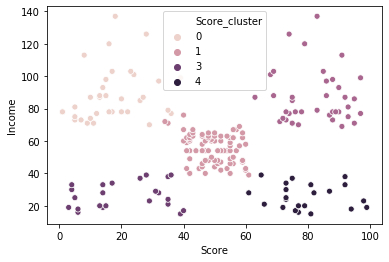

In [126]:
seaborn.scatterplot(x='Score',y='Income',hue='Score_cluster',data=df)

In [109]:
km=cluster.KMeans(n_clusters=4)


In [110]:
km=km.fit(df[['Age','Income']])

In [111]:
km.cluster_centers_

array([[ 39.        , 106.5       ],
       [ 55.67857143,  50.03571429],
       [ 32.2972973 ,  72.98648649],
       [ 28.82608696,  29.41304348]])

In [112]:
df['Age_cluster']=km.labels_

In [113]:
df

,CustomerID,Gender,Age,Income,Score,Score_cluster,Age_cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,3
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,4,3
4,5,Female,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,0,0


In [114]:
df['Age_cluster'].value_counts()

2    74
1    56
3    46
0    24
Name: Age_cluster, dtype: int64

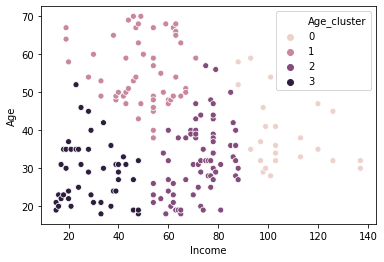

In [115]:
seaborn.scatterplot(x="Income",y="Age",hue="Age_cluster",data=df)

In [116]:
kmeans=cluster.KMeans(n_clusters=4)


In [117]:
Kmeans=kmeans.fit(df[['Age','Score']])

In [118]:
Kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [119]:
df['Age_score_cl']=Kmeans.labels_

In [120]:
df

,CustomerID,Gender,Age,Income,Score,Score_cluster,Age_cluster,Age_score_cl
0,1,Male,19,15,39,3,3,3
1,2,Male,21,15,81,4,3,1
2,3,Female,20,16,6,3,3,2
3,4,Female,23,16,77,4,3,1
4,5,Female,31,17,40,3,3,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,1
196,197,Female,45,126,28,0,0,2
197,198,Male,32,126,74,2,0,1
198,199,Male,32,137,18,0,0,2


In [121]:
df['Age_score_cl'].value_counts()

1    57
2    48
0    48
3    47
Name: Age_score_cl, dtype: int64

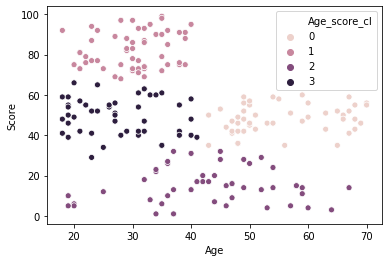

In [122]:
seaborn.scatterplot(x='Age',y='Score',hue='Age_score_cl',data=df)